In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

DATA_PATH_BERT_NAOBINARIO = "../ResultadoSalvo/Resultado_Completo_ClassificadorNaoBinario_BERT10.csv"
DATA_PATH_BERT_BINARIO = "../ResultadoSalvo/Resultado_Completo_ClassificadorBinario_BERT10.csv"

DATA_PATH_SVM_NAOBINARIO = "../ResultadoSalvo/Resultado_Teste_ClassificadorNaoBinario_W2V50D_SVM.csv"
DATA_PATH_SVM_BINARIO = "../ResultadoSalvo/Resultado_Teste_ClassificadorBinario_W2V50D_SVM.csv"

DATA_PATH_GPT_NAOBINARIO = "../ResultadoSalvo/Resultado_Completo_ClassificadorNaoBinario_GPT.csv"
DATA_PATH_GPT_BINARIO = "../ResultadoSalvo/Resultado_Completo_ClassificadorNaoBinario_GPT.csv"

In [143]:
dados_NaoBinario_BERT = pd.read_csv(DATA_PATH_BERT_NAOBINARIO,index_col="indice")
dados_Binario_BERT = pd.read_csv(DATA_PATH_BERT_BINARIO,index_col="indice")

dados_NaoBinario_SVM = pd.read_csv(DATA_PATH_SVM_NAOBINARIO,index_col="Unnamed: 0",sep=";")
dados_Binario_SVM = pd.read_csv(DATA_PATH_SVM_BINARIO,index_col="Unnamed: 0",sep=";")

dados_NaoBinario_GPT = pd.read_csv(DATA_PATH_GPT_NAOBINARIO,index_col="indice")
dados_Binario_GPT = pd.read_csv(DATA_PATH_GPT_BINARIO,index_col="indice")
dados_Binario_GPT = dados_Binario_GPT[(dados_Binario_GPT['sentimento_GPT'] !="x") & (dados_Binario_GPT['sentimento_humano'] !="x")]

In [144]:
display(dados_Binario_SVM)

,Comentario,ClassificacaoManual,ClassificacaoSVM
0,'Bem-vinda' Skynet...,0,0
1,Usar IA pra ler as legislações do Brasil e bai...,1,0
2,"Eu, eu to com medo do que essas inteligências ...",0,0
3,O bagulho vai fica loko nos próximos anos,1,1
4,Obrigado Deus por dar capacidade ao homem i mu...,1,1
...,...,...,...
189,O chat gpt veio para fazer com que o Google fa...,1,0
190,Da picanha vocês só vão comer a pic4 mais n es...,0,0
191,chat gpt n sabe da uma resposta certa quanto m...,0,0
192,Não devemos dar atenção a inteligência artific...,1,1


Comparando resultados não binários

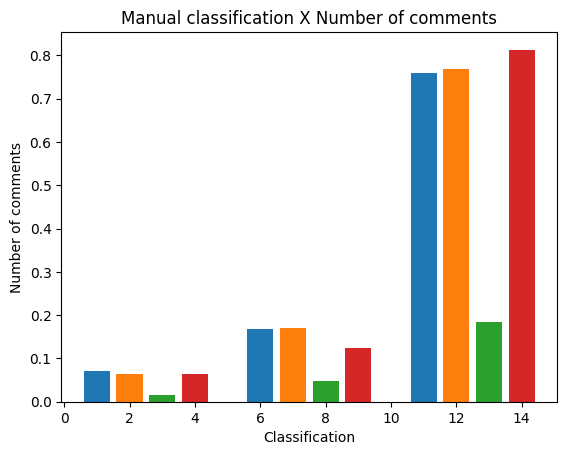

In [145]:

numeroTotalComentarios = dados_NaoBinario_BERT['comentario'].count()

plt.bar(x=[1,6,11],height=[(dados_NaoBinario_BERT[dados_NaoBinario_BERT['sentimento_humano']=="p"]['comentario']).count()/numeroTotalComentarios,(dados_NaoBinario_BERT[dados_NaoBinario_BERT['sentimento_humano']=="n"]['comentario']).count()/numeroTotalComentarios, (dados_NaoBinario_BERT[dados_NaoBinario_BERT['sentimento_humano']=="x"]['comentario']).count()/numeroTotalComentarios])
plt.bar(x=[2,7,12],height=[(dados_NaoBinario_BERT[dados_NaoBinario_BERT['sentimento_BERT']=="p"]['comentario']).count()/numeroTotalComentarios,(dados_NaoBinario_BERT[dados_NaoBinario_BERT['sentimento_BERT']=="n"]['comentario']).count()/numeroTotalComentarios, (dados_NaoBinario_BERT[dados_NaoBinario_BERT['sentimento_BERT']=="x"]['comentario']).count()/numeroTotalComentarios])
plt.bar(x=[3,8,13],height=[(dados_NaoBinario_SVM[dados_NaoBinario_SVM['ClassificacaoSVM']==1]['Comentario']).count()/numeroTotalComentarios,(dados_NaoBinario_SVM[dados_NaoBinario_SVM['ClassificacaoSVM']==0]['Comentario']).count()/numeroTotalComentarios, (dados_NaoBinario_SVM[dados_NaoBinario_SVM['ClassificacaoSVM']==2]['Comentario']).count()/numeroTotalComentarios])
plt.bar(x=[4,9,14],height=[(dados_NaoBinario_GPT[dados_NaoBinario_GPT['sentimento_GPT']=="p"]['comentario']).count()/numeroTotalComentarios,(dados_NaoBinario_GPT[dados_NaoBinario_GPT['sentimento_GPT']=="n"]['comentario']).count()/numeroTotalComentarios, (dados_NaoBinario_GPT[dados_NaoBinario_GPT['sentimento_GPT']=="x"]['comentario']).count()/numeroTotalComentarios])
# plt.xticks([r + barwidth for r in range(3)],['Positivo','Negativo','Neutro'])


plt.ylabel("Number of comments")
plt.xlabel("Classification")
plt.title("Manual classification X Number of comments")
plt.show()

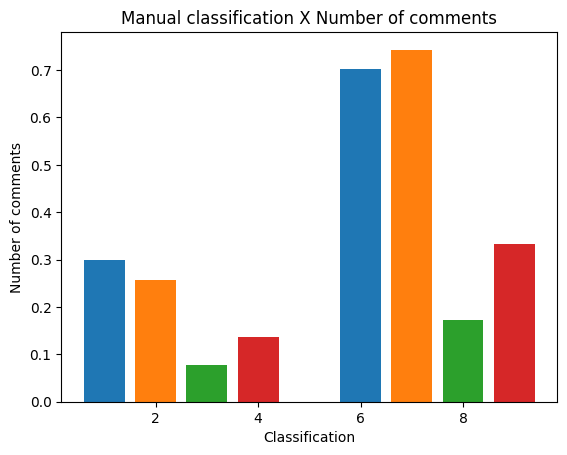

In [146]:
numeroTotalComentarios = dados_Binario_BERT['comentario'].count()

plt.bar(x=[1,6],height=[(dados_Binario_BERT[dados_Binario_BERT['sentimento_humano']=="p"]['comentario']).count()/numeroTotalComentarios,(dados_Binario_BERT[dados_Binario_BERT['sentimento_humano']=="n"]['comentario']).count()/numeroTotalComentarios])
plt.bar(x=[2,7],height=[(dados_Binario_BERT[dados_Binario_BERT['sentimento_BERT']=="p"]['comentario']).count()/numeroTotalComentarios,(dados_Binario_BERT[dados_Binario_BERT['sentimento_BERT']=="n"]['comentario']).count()/numeroTotalComentarios])
plt.bar(x=[3,8],height=[(dados_Binario_SVM[dados_Binario_SVM['ClassificacaoSVM']==1]['Comentario']).count()/numeroTotalComentarios,(dados_Binario_SVM[dados_Binario_SVM['ClassificacaoSVM']==0]['Comentario']).count()/numeroTotalComentarios])
plt.bar(x=[4,9],height=[(dados_Binario_GPT[dados_Binario_GPT['sentimento_GPT']=="p"]['comentario']).count()/numeroTotalComentarios,(dados_Binario_GPT[dados_Binario_GPT['sentimento_GPT']=="n"]['comentario']).count()/numeroTotalComentarios])
# plt.xticks([r + barwidth for r in range(3)],['Positivo','Negativo','Neutro'])


plt.ylabel("Number of comments")
plt.xlabel("Classification")
plt.title("Manual classification X Number of comments")
plt.show()

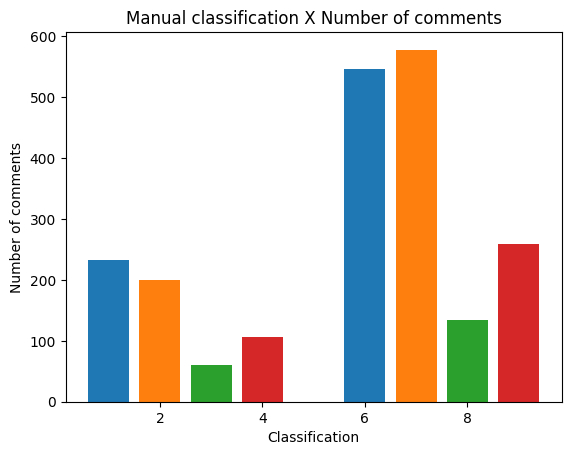

In [147]:
numeroTotalComentarios = dados_Binario_BERT['comentario'].count()

plt.bar(x=[1,6],height=[(dados_Binario_BERT[dados_Binario_BERT['sentimento_humano']=="p"]['comentario']).count(),(dados_Binario_BERT[dados_Binario_BERT['sentimento_humano']=="n"]['comentario']).count()])
plt.bar(x=[2,7],height=[(dados_Binario_BERT[dados_Binario_BERT['sentimento_BERT']=="p"]['comentario']).count(),(dados_Binario_BERT[dados_Binario_BERT['sentimento_BERT']=="n"]['comentario']).count()])
plt.bar(x=[3,8],height=[(dados_Binario_SVM[dados_Binario_SVM['ClassificacaoSVM']==1]['Comentario']).count(),(dados_Binario_SVM[dados_Binario_SVM['ClassificacaoSVM']==0]['Comentario']).count()])
plt.bar(x=[4,9],height=[(dados_Binario_GPT[dados_Binario_GPT['sentimento_GPT']=="p"]['comentario']).count(),(dados_Binario_GPT[dados_Binario_GPT['sentimento_GPT']=="n"]['comentario']).count()])
# plt.xticks([r + barwidth for r in range(3)],['Positivo','Negativo','Neutro'])


plt.ylabel("Number of comments")
plt.xlabel("Classification")
plt.title("Manual classification X Number of comments")
plt.show()

In [148]:
BERT_err = [0,0,0,0]
display("Acertos positivos")
BERT_err[0] = (dados_Binario_BERT[(dados_Binario_BERT['sentimento_humano']=="p") & (dados_Binario_BERT['sentimento_BERT']=="p")]['comentario']).count()
display(BERT_err[0])
display("Erros positivos")
BERT_err[1] = (dados_Binario_BERT[(dados_Binario_BERT['sentimento_humano']=="p") & (dados_Binario_BERT['sentimento_BERT']!="p")]['comentario']).count()
display(BERT_err[1])
display("Acertos negativos")
BERT_err[2] = (dados_Binario_BERT[(dados_Binario_BERT['sentimento_humano']=="n") & (dados_Binario_BERT['sentimento_BERT']=="n")]['comentario']).count()
display(BERT_err[2])
display("Erros negativos")
BERT_err[3] = (dados_Binario_BERT[(dados_Binario_BERT['sentimento_humano']=="n") & (dados_Binario_BERT['sentimento_BERT']!="n")]['comentario']).count()
display(BERT_err[3])
display(BERT_err)

tmp = BERT_err[0] + BERT_err[1]
BERT_err[0] = BERT_err[0]/(tmp)
BERT_err[1] = BERT_err[1]/(tmp)
tmp = BERT_err[2] + BERT_err[3]
BERT_err[2] = BERT_err[2]/(tmp)
BERT_err[3] = BERT_err[3]/(tmp)


'Acertos positivos'

192

'Erros positivos'

40

'Acertos negativos'

538

'Erros negativos'

8

[192, 40, 538, 8]

In [149]:
SVM_err = [0,0,0,0]
display("Acertos positivos")
SVM_err[0] = (dados_Binario_SVM[(dados_Binario_SVM['ClassificacaoManual']==1) & (dados_Binario_SVM['ClassificacaoSVM']==1)]['Comentario']).count()
display(SVM_err[0])
display("Erros positivos")
SVM_err[1] = (dados_Binario_SVM[(dados_Binario_SVM['ClassificacaoManual']==1) & (dados_Binario_SVM['ClassificacaoSVM']!=1)]['Comentario']).count()
display(SVM_err[1])
display("Acertos negativos")
SVM_err[2] = (dados_Binario_SVM[(dados_Binario_SVM['ClassificacaoManual']==0) & (dados_Binario_SVM['ClassificacaoSVM']==0)]['Comentario']).count()
display(SVM_err[2])
display("Erros negativos")
SVM_err[3] = (dados_Binario_SVM[(dados_Binario_SVM['ClassificacaoManual']==0) & (dados_Binario_SVM['ClassificacaoSVM']!=0)]['Comentario']).count()
display(SVM_err[3])
display(SVM_err)

tmp = SVM_err[0] + SVM_err[1]
SVM_err[0] = SVM_err[0]/(tmp)
SVM_err[1] = SVM_err[1]/(tmp)
tmp = SVM_err[2] + SVM_err[3]
SVM_err[2] = SVM_err[2]/(tmp)
SVM_err[3] = SVM_err[3]/(tmp)

display(SVM_err)

'Acertos positivos'

24

'Erros positivos'

35

'Acertos negativos'

99

'Erros negativos'

36

[24, 35, 99, 36]

[0.4067796610169492,
 0.5932203389830508,
 0.7333333333333333,
 0.26666666666666666]

In [150]:
GPT_err = [0,0,0,0]
display("Acertos positivos")
GPT_err[0] = (dados_Binario_GPT[(dados_Binario_GPT['sentimento_humano']=="p") & (dados_Binario_GPT['sentimento_GPT']=="p")]['comentario']).count()
display(GPT_err[0])
display("Erros positivos")
GPT_err[1] = (dados_Binario_GPT[(dados_Binario_GPT['sentimento_humano']=="p") & (dados_Binario_GPT['sentimento_GPT']!="p")]['comentario']).count()
display(GPT_err[1])
display("Acertos negativos")
GPT_err[2] = (dados_Binario_GPT[(dados_Binario_GPT['sentimento_humano']=="n") & (dados_Binario_GPT['sentimento_GPT']=="n")]['comentario']).count()
display(GPT_err[2])
display("Erros negativos")
GPT_err[3] = (dados_Binario_GPT[(dados_Binario_GPT['sentimento_humano']=="n") & (dados_Binario_GPT['sentimento_GPT']!="n")]['comentario']).count()
display(GPT_err[3])
display(GPT_err)

tmp = GPT_err[0] + GPT_err[1]
GPT_err[0] = GPT_err[0]/(tmp)
GPT_err[1] = GPT_err[1]/(tmp)
tmp = GPT_err[2] + GPT_err[3]
GPT_err[2] = GPT_err[2]/(tmp)
GPT_err[3] = GPT_err[3]/(tmp)

'Acertos positivos'

86

'Erros positivos'

26

'Acertos negativos'

233

'Erros negativos'

20

[86, 26, 233, 20]

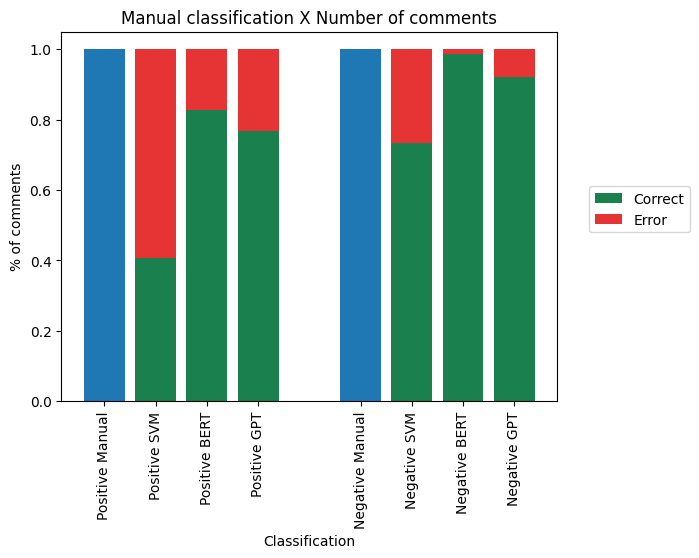

In [158]:

plt.bar(x=[1,6],height=[1,1])
plt.bar(x=[2,7],height=[SVM_err[0],SVM_err[2]],label="Correct",color=[0.1,0.5,0.3])
plt.bar(x=[2,7],height=[SVM_err[1],SVM_err[3]], label="Error",color=[0.9,0.2,0.2], bottom=[SVM_err[0],SVM_err[2]])
plt.bar(x=[3,8],height=[BERT_err[0],BERT_err[2]],color=[0.1,0.5,0.3])
plt.bar(x=[3,8],height=[BERT_err[1],BERT_err[3]],color=[0.9,0.2,0.2], bottom=[BERT_err[0],BERT_err[2]])
plt.bar(x=[4,9],height=[GPT_err[0],GPT_err[2]],color=[0.1,0.5,0.3])
plt.bar(x=[4,9],height=[GPT_err[1],GPT_err[3]],color=[0.9,0.2,0.2], bottom=[GPT_err[0],GPT_err[2]])
plt.xticks([1,2,3,4,6,7,8,9],['Positive Manual','Positive SVM', 'Positive BERT', 'Positive GPT', 'Negative Manual','Negative SVM','Negative BERT','Negative GPT'],rotation=90)



plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.ylabel("% of comments")
plt.xlabel("Classification")
plt.title("Model Classification X % of comments")
plt.show()

In [152]:
BERT_NaoBin_err = [0,0,0,0,0,0]
display("Acertos positivos")
BERT_NaoBin_err[0] = (dados_NaoBinario_BERT[(dados_NaoBinario_BERT['sentimento_humano']=="p") & (dados_NaoBinario_BERT['sentimento_BERT']=="p")]['comentario']).count()
display(BERT_NaoBin_err[0])
display("Erros positivos")
BERT_NaoBin_err[1] = (dados_NaoBinario_BERT[(dados_NaoBinario_BERT['sentimento_humano']=="p") & (dados_NaoBinario_BERT['sentimento_BERT']!="p")]['comentario']).count()
display(BERT_NaoBin_err[1])
display("Acertos negativos")
BERT_NaoBin_err[2] = (dados_NaoBinario_BERT[(dados_NaoBinario_BERT['sentimento_humano']=="n") & (dados_NaoBinario_BERT['sentimento_BERT']=="n")]['comentario']).count()
display(BERT_NaoBin_err[2])
display("Erros negativos")
BERT_NaoBin_err[3] = (dados_NaoBinario_BERT[(dados_NaoBinario_BERT['sentimento_humano']=="n") & (dados_NaoBinario_BERT['sentimento_BERT']!="n")]['comentario']).count()
display("Acertos neutros")
BERT_NaoBin_err[4] = (dados_NaoBinario_BERT[(dados_NaoBinario_BERT['sentimento_humano']=="x") & (dados_NaoBinario_BERT['sentimento_BERT']=="x")]['comentario']).count()
display(BERT_NaoBin_err[5])
display("Erros neutros")
BERT_NaoBin_err[5] = (dados_NaoBinario_BERT[(dados_NaoBinario_BERT['sentimento_humano']=="x") & (dados_NaoBinario_BERT['sentimento_BERT']!="x")]['comentario']).count()
display(BERT_NaoBin_err[5])
display(BERT_NaoBin_err)

tmp = BERT_NaoBin_err[0] + BERT_NaoBin_err[1]
BERT_NaoBin_err[0] = BERT_NaoBin_err[0]/(tmp)
BERT_NaoBin_err[1] = BERT_NaoBin_err[1]/(tmp)
tmp = BERT_NaoBin_err[2] + BERT_NaoBin_err[3]
BERT_NaoBin_err[2] = BERT_NaoBin_err[2]/(tmp)
BERT_NaoBin_err[3] = BERT_NaoBin_err[3]/(tmp)
tmp = BERT_NaoBin_err[4] + BERT_NaoBin_err[5]
BERT_NaoBin_err[4] = BERT_NaoBin_err[4]/(tmp)
BERT_NaoBin_err[5] = BERT_NaoBin_err[5]/(tmp)
display(BERT_NaoBin_err)

'Acertos positivos'

183

'Erros positivos'

49

'Acertos negativos'

496

'Erros negativos'

'Acertos neutros'

0

'Erros neutros'

48

[183, 49, 496, 50, 2420, 48]

[0.7887931034482759,
 0.21120689655172414,
 0.9084249084249084,
 0.09157509157509157,
 0.9805510534846029,
 0.019448946515397084]

In [153]:
SVM_NaoBin_err = [0,0,0,0,0,0]
display("Acertos positivos")
SVM_NaoBin_err[0] = (dados_NaoBinario_SVM[(dados_NaoBinario_SVM['ClassificacaoManual']==1) & (dados_NaoBinario_SVM['ClassificacaoSVM']==1)]['Comentario']).count()
display(SVM_NaoBin_err[0])
display("Erros positivos")
SVM_NaoBin_err[1] = (dados_NaoBinario_SVM[(dados_NaoBinario_SVM['ClassificacaoManual']==1) & (dados_NaoBinario_SVM['ClassificacaoSVM']!=1)]['Comentario']).count()
display(SVM_NaoBin_err[1])
display("Acertos negativos")
SVM_NaoBin_err[2] = (dados_NaoBinario_SVM[(dados_NaoBinario_SVM['ClassificacaoManual']==0) & (dados_NaoBinario_SVM['ClassificacaoSVM']==0)]['Comentario']).count()
display(SVM_NaoBin_err[2])
display("Erros negativos")
SVM_NaoBin_err[3] = (dados_NaoBinario_SVM[(dados_NaoBinario_SVM['ClassificacaoManual']==0) & (dados_NaoBinario_SVM['ClassificacaoSVM']!=0)]['Comentario']).count()
display(SVM_NaoBin_err[3])
display("Acertos neutros")
SVM_NaoBin_err[4] = (dados_NaoBinario_SVM[(dados_NaoBinario_SVM['ClassificacaoManual']==2) & (dados_NaoBinario_SVM['ClassificacaoSVM']==2)]['Comentario']).count()
display(SVM_NaoBin_err[4])
display("Erros neutros")
SVM_NaoBin_err[5] = (dados_NaoBinario_SVM[(dados_NaoBinario_SVM['ClassificacaoManual']==2) & (dados_NaoBinario_SVM['ClassificacaoSVM']!=2)]['Comentario']).count()
display(SVM_NaoBin_err[5])
display(SVM_NaoBin_err)

tmp = SVM_NaoBin_err[0] + SVM_NaoBin_err[1]
SVM_NaoBin_err[0] = SVM_NaoBin_err[0]/(tmp)
SVM_NaoBin_err[1] = SVM_NaoBin_err[1]/(tmp)
tmp = SVM_NaoBin_err[2] + SVM_NaoBin_err[3]
SVM_NaoBin_err[2] = SVM_NaoBin_err[2]/(tmp)
SVM_NaoBin_err[3] = SVM_NaoBin_err[3]/(tmp)
tmp = SVM_NaoBin_err[4] + SVM_NaoBin_err[5]
SVM_NaoBin_err[4] = SVM_NaoBin_err[4]/(tmp)
SVM_NaoBin_err[5] = SVM_NaoBin_err[5]/(tmp)

display(SVM_NaoBin_err)

'Acertos positivos'

7

'Erros positivos'

48

'Acertos negativos'

48

'Erros negativos'

81

'Acertos neutros'

502

'Erros neutros'

126

[7, 48, 48, 81, 502, 126]

[0.12727272727272726,
 0.8727272727272727,
 0.37209302325581395,
 0.627906976744186,
 0.7993630573248408,
 0.20063694267515925]

In [154]:
GPT_NaoBin_err = [0,0,0,0,0,0]
display("Acertos positivos")
GPT_NaoBin_err[0] = (dados_NaoBinario_GPT[(dados_NaoBinario_GPT['sentimento_humano']=="p") & (dados_NaoBinario_GPT['sentimento_GPT']=="p")]['comentario']).count()
display(GPT_NaoBin_err[0])
display("Erros positivos")
GPT_NaoBin_err[1] = (dados_NaoBinario_GPT[(dados_NaoBinario_GPT['sentimento_humano']=="p") & (dados_NaoBinario_GPT['sentimento_GPT']!="p")]['comentario']).count()
display(GPT_NaoBin_err[1])
display("Acertos negativos")
GPT_NaoBin_err[2] = (dados_NaoBinario_GPT[(dados_NaoBinario_GPT['sentimento_humano']=="n") & (dados_NaoBinario_GPT['sentimento_GPT']=="n")]['comentario']).count()
display(GPT_NaoBin_err[2])
display("Erros negativos")
GPT_NaoBin_err[3] = (dados_NaoBinario_GPT[(dados_NaoBinario_GPT['sentimento_humano']=="n") & (dados_NaoBinario_GPT['sentimento_GPT']!="n")]['comentario']).count()
display(GPT_NaoBin_err[3])
display("Acertos neutros")
GPT_NaoBin_err[4] = (dados_NaoBinario_GPT[(dados_NaoBinario_GPT['sentimento_humano']=="x") & (dados_NaoBinario_GPT['sentimento_GPT']=="x")]['comentario']).count()
display(GPT_NaoBin_err[4])
display("Erros negativos")
GPT_NaoBin_err[5] = (dados_NaoBinario_GPT[(dados_NaoBinario_GPT['sentimento_humano']=="x") & (dados_NaoBinario_GPT['sentimento_GPT']!="x")]['comentario']).count()
display(GPT_NaoBin_err[5])
display(GPT_NaoBin_err)

tmp = GPT_NaoBin_err[0] + GPT_NaoBin_err[1]
GPT_NaoBin_err[0] = GPT_NaoBin_err[0]/(tmp)
GPT_NaoBin_err[1] = GPT_NaoBin_err[1]/(tmp)
tmp = GPT_NaoBin_err[2] + GPT_NaoBin_err[3]
GPT_NaoBin_err[2] = GPT_NaoBin_err[2]/(tmp)
GPT_NaoBin_err[3] = GPT_NaoBin_err[3]/(tmp)
tmp = GPT_NaoBin_err[4] + GPT_NaoBin_err[5]
GPT_NaoBin_err[4] = GPT_NaoBin_err[4]/(tmp)
GPT_NaoBin_err[5] = GPT_NaoBin_err[5]/(tmp)

display(GPT_NaoBin_err)

'Acertos positivos'

86

'Erros positivos'

146

'Acertos negativos'

233

'Erros negativos'

313

'Acertos neutros'

2226

'Erros negativos'

242

[86, 146, 233, 313, 2226, 242]

[0.3706896551724138,
 0.6293103448275862,
 0.4267399267399267,
 0.5732600732600732,
 0.9019448946515397,
 0.09805510534846029]

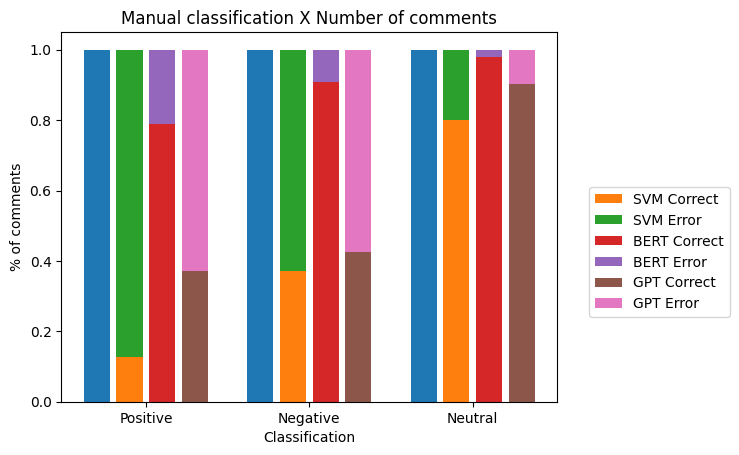

In [155]:
plt.bar(x=[1,6,11],height=[1,1,1])
plt.bar(x=[2,7,12],height=[SVM_NaoBin_err[0],SVM_NaoBin_err[2],SVM_NaoBin_err[4]],label="SVM Correct")
plt.bar(x=[2,7,12],height=[SVM_NaoBin_err[1],SVM_NaoBin_err[3],SVM_NaoBin_err[5]], label="SVM Error", bottom=[SVM_NaoBin_err[0],SVM_NaoBin_err[2],SVM_NaoBin_err[4]])
plt.bar(x=[3,8,13],height=[BERT_NaoBin_err[0],BERT_NaoBin_err[2],BERT_NaoBin_err[4]],label="BERT Correct")
plt.bar(x=[3,8,13],height=[BERT_NaoBin_err[1],BERT_NaoBin_err[3],BERT_NaoBin_err[5]], label="BERT Error", bottom=[BERT_NaoBin_err[0],BERT_NaoBin_err[2],BERT_NaoBin_err[4]])
plt.bar(x=[4,9,14],height=[GPT_NaoBin_err[0],GPT_NaoBin_err[2],GPT_NaoBin_err[4]],label="GPT Correct")
plt.bar(x=[4,9,14],height=[GPT_NaoBin_err[1],GPT_NaoBin_err[3],GPT_NaoBin_err[5]], label="GPT Error", bottom=[GPT_NaoBin_err[0],GPT_NaoBin_err[2],GPT_NaoBin_err[4]])
plt.xticks([2.5,7.5,12.5],['Positive','Negative', 'Neutral'])

plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.ylabel("% of comments")
plt.xlabel("Classification")
plt.title("Manual classification X Number of comments")
plt.show()

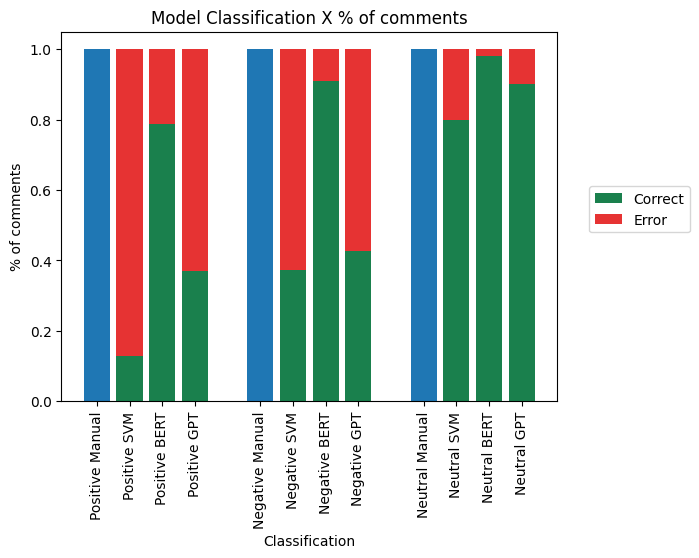

In [159]:
plt.bar(x=[1,6,11],height=[1,1,1])
plt.bar(x=[2,7,12],height=[SVM_NaoBin_err[0],SVM_NaoBin_err[2],SVM_NaoBin_err[4]],label="Correct",color=[0.1,0.5,0.3])
plt.bar(x=[2,7,12],height=[SVM_NaoBin_err[1],SVM_NaoBin_err[3],SVM_NaoBin_err[5]], label="Error",color=[0.9,0.2,0.2], bottom=[SVM_NaoBin_err[0],SVM_NaoBin_err[2],SVM_NaoBin_err[4]])
plt.bar(x=[3,8,13],height=[BERT_NaoBin_err[0],BERT_NaoBin_err[2],BERT_NaoBin_err[4]],color=[0.1,0.5,0.3])
plt.bar(x=[3,8,13],height=[BERT_NaoBin_err[1],BERT_NaoBin_err[3],BERT_NaoBin_err[5]], color=[0.9,0.2,0.2], bottom=[BERT_NaoBin_err[0],BERT_NaoBin_err[2],BERT_NaoBin_err[4]])
plt.bar(x=[4,9,14],height=[GPT_NaoBin_err[0],GPT_NaoBin_err[2],GPT_NaoBin_err[4]],color=[0.1,0.5,0.3])
plt.bar(x=[4,9,14],height=[GPT_NaoBin_err[1],GPT_NaoBin_err[3],GPT_NaoBin_err[5]],color=[0.9,0.2,0.2], bottom=[GPT_NaoBin_err[0],GPT_NaoBin_err[2],GPT_NaoBin_err[4]])
plt.xticks([1,2,3,4,6,7,8,9,11,12,13,14],['Positive Manual','Positive SVM', 'Positive BERT', 'Positive GPT', 'Negative Manual','Negative SVM','Negative BERT','Negative GPT','Neutral Manual','Neutral SVM','Neutral BERT','Neutral GPT'],rotation=90)



plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.ylabel("% of comments")
plt.xlabel("Classification")
plt.title("Model Classification X % of comments")


plt.show()